##### movies-q1 notebook
***

<h1>Question 1 - What are the highest grossing, recent movies?</h1>

### Let's set the scene and explore our first question:
    1. How does the industry look?
    2. What are the top grossing movies for the most recent, full year?
    3. What are the top grossing movies, including the additional 2 years prior?

## import required libraries

In [1]:
import os # for setting the current directory

import numpy as np
import pandas as pd

import sqlite3
import pandasql

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# set the current working directory
os.chdir("c:/users/jd/flatiron/project01/dsc-mod-1-project-v2-1-online-ds-ft-120919/")

# print the current working directory
print(os.getcwd())

c:\users\jd\flatiron\project01\dsc-mod-1-project-v2-1-online-ds-ft-120919


### connect to sqlite database

In [3]:
# connect to sql movies_db data source and instantiate a cursor
conn = sqlite3.connect("movies_db.sqlite")
cur = conn.cursor()

### list the sqlite table names

In [4]:
# get names of all tables in the sql database
sql_tables = conn.execute("select name from sqlite_master where type='table';")

# assign table names to a variable as a list for future iteration
table_list = list(map(lambda x: x[0], sql_tables.fetchall()))
table_list

['clean_bom_tbl', 'clean_tn_tbl', 'studio_titles_tbl', 'clean_imdb_title_tbl']

***

<h2 align='center'><font color='chocolate'>Highest grossing movies</font></h2>

In [5]:
# connect to the required tables
cur.execute('''SELECT *
                    FROM clean_bom_tbl
                    ;''')

bom_df = pd.DataFrame(cur.fetchall())
bom_df.columns = [x[0] for x in cur.description]
bom_df.head(5)

,index,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [6]:
# what were the top 10 highest - gross movies in 2018
bom_2018_df = bom_df.loc[bom_df.year == 2018]
display(bom_2018_df.sort_values(by=['Total_gross'], ascending=False).head(10))

#2016 - 2018
bom_2016_18_df = bom_df.loc[bom_df.year.between (2016, 2018)]
display(bom_2016_18_df.sort_values(by=['Total_gross'], ascending=False).head(10))

,index,title,studio,domestic_gross,foreign_gross,year,Total_gross
3075,3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3076,3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
3077,3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
3078,3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
3079,3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
3080,3085,Venom (2018),Sony,213500000.0,641500000.0,2018,8.550000e+08
3081,3086,Mission: Impossible - Fallout,Par.,220200000.0,571000000.0,2018,7.912000e+08
3082,3087,Deadpool 2,Fox,318500000.0,460500000.0,2018,7.790000e+08
3074,3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
3083,3088,Fantastic Beasts: The Crimes of Grindelwald,WB,159600000.0,494100000.0,2018,6.537000e+08


,index,title,studio,domestic_gross,foreign_gross,year,Total_gross
3075,3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
2754,2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3076,3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
2755,2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3077,3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2318,2322,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09
3078,3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
2319,2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2757,2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017,1.034800e+09
2320,2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09


### Even before visual EDA the data is beginning to tell a story re. action/ adventure, sequels, franchises, remakes, and animation.

In [7]:
# connect to the table for 2018
cur.execute('''SELECT *
                    FROM clean_bom_tbl
                    WHERE year == 2018
                    ORDER BY Total_gross DESC
                    LIMIT 10
                    ;''')

bom_18_title_10_df = pd.DataFrame(cur.fetchall())
bom_18_title_10_df.columns = [x[0] for x in cur.description]

In [8]:
# connect to the table for 2016-2018
cur.execute('''SELECT *
                    FROM clean_bom_tbl
                    WHERE year BETWEEN 2016 AND 2018
                    ORDER BY Total_gross DESC
                    LIMIT 10
                    ;''')

bom_16_18_title_10_df = pd.DataFrame(cur.fetchall())
bom_16_18_title_10_df.columns = [x[0] for x in cur.description]

<h2 align='center'><font color='coral'>Visual EDA</font></h2>

#### What can we learn from visualizing these dataframes?

In [9]:
# initialize a variable
df_0 = bom_18_title_10_df
df_0.set_index("title", drop=True,inplace=True)
df_0.head(1)

,index,studio,domestic_gross,foreign_gross,year,Total_gross
title,,,,,,
Black Panther,3080,BV,700100000.0,646900000.0,2018,1.347000e+09


In [10]:
df_1 = bom_16_18_title_10_df
df_1.set_index("title", drop=True,inplace=True)

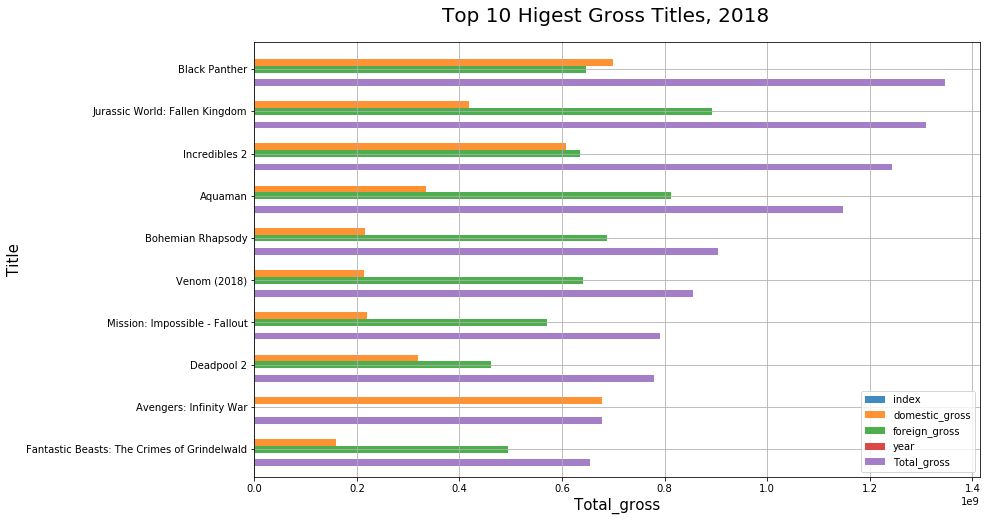

In [11]:
# plot 2018 data horizontally
df_0.plot( kind='barh', figsize=(13,8), grid=True, alpha=.85, width=.8 )
plt.style.use('seaborn-muted')

plt.suptitle('Top 10 Higest Gross Titles, 2018', fontsize=20, y=.94)
plt.xlabel('Total_gross', fontsize=15)
plt.ylabel('Title', fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highes grossing title on top

plt.show()

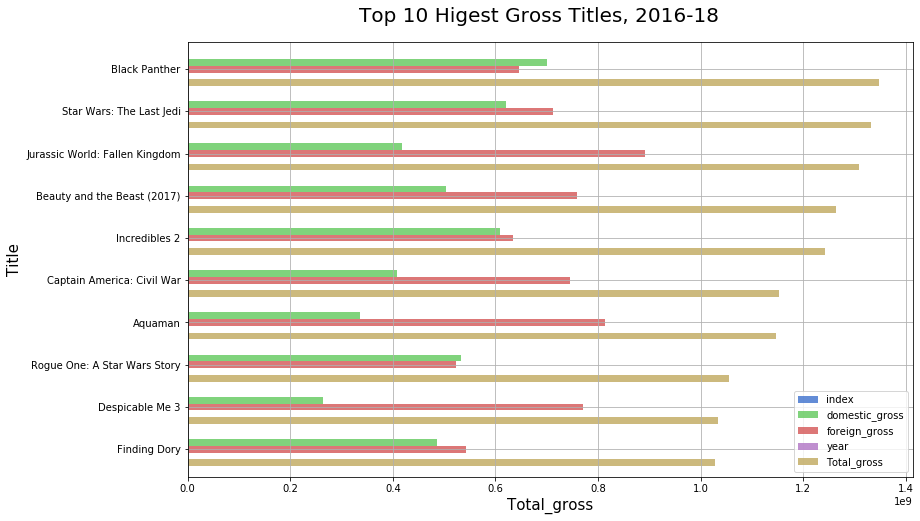

In [12]:
# plot 2016-18 data horizontally
df_1.plot( kind='barh', figsize=(13,8), grid=True, alpha=.85, width=.8 )
plt.style.use('seaborn-muted')

plt.suptitle('Top 10 Higest Gross Titles, 2016-18', fontsize=20, y=.94)
plt.xlabel('Total_gross', fontsize=15)
plt.ylabel('Title', fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highes grossing title on top

plt.show()

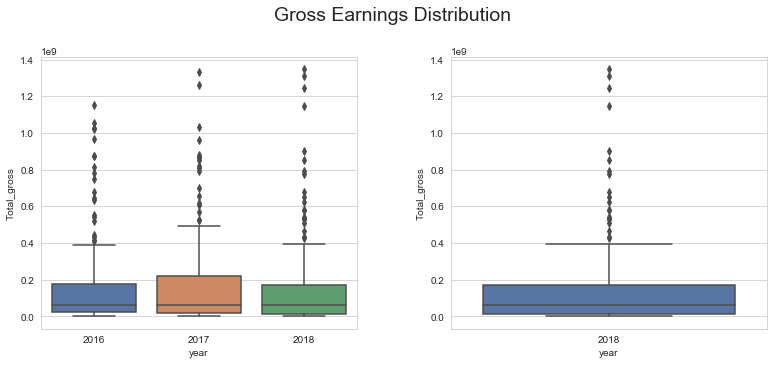

In [13]:
# viewing the three most recent years from the dataset
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))
sns.set(context='notebook', font_scale=1.35)

# give a little more space between the 'suptitle' and fiugre
fig.suptitle("Gross Earnings Distribution", y=1.02)
# and between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)

sns.boxplot(x="year", y="Total_gross", data=bom_2016_18_df, ax=ax[0])
sns.boxplot(x="year", y="Total_gross", data=bom_2018_df, ax=ax[1])

plt.show()

Top grossing movies are and have been far above the norm, with the top 10-or-more being outliers in each year observed and median values toward the bottom of the lower - middle quartile.

#### Let's get a better idea of where is that middle.

C:\Users\jd\Miniconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jd\Miniconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


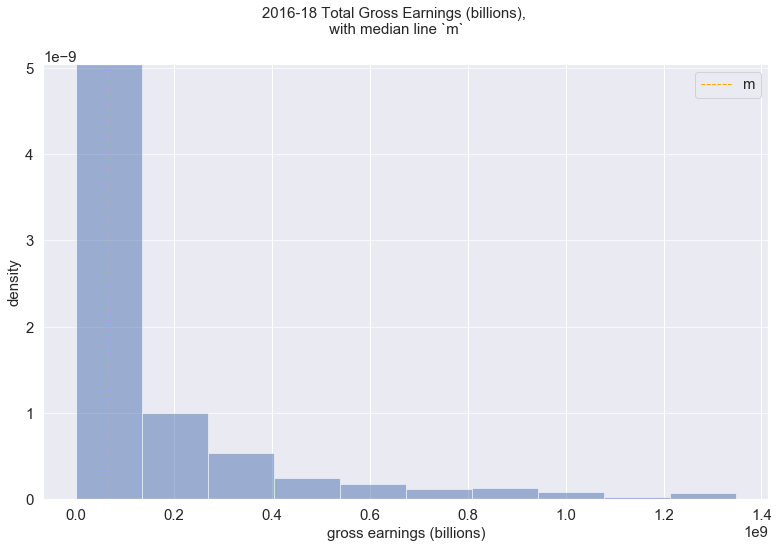

In [14]:
# create a plot
plt.figure(figsize=(13, 8))

# data and number of groupings
plt.hist(bom_2016_18_df.Total_gross, bins=10, density=True, alpha=.5)

# chart appearance
plt.grid(axis='y', alpha=0.75)
plt.xlabel('gross earnings (billions)',fontsize=15)
plt.ylabel('density',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.suptitle("2016-18 Total Gross Earnings (billions),\n with median line `m`", fontsize=15)

plt.axvline(bom_2016_18_df.Total_gross.median(
), color='orange', linestyle='dashed', linewidth=1)

plt.legend("m")

plt.show()

# We can see that most movies perform toward the lower end.

In [15]:
print(f"...bearing-in-mind that most movie (0-2 on the plot) earnings are located about {bom_16_18_title_10_df.Total_gross.median()} (abpve 1B).")

...bearing-in-mind that most movie (0-2 on the plot) earnings are located about 1198050000.0 (abpve 1B).


In [16]:
# There is a lot going on in the middle
total_median_16_18 = bom_2016_18_df.Total_gross.median()
total_std_16_18 = bom_2016_18_df.Total_gross.std()

lower_upper_16_18 = total_median_16_18 + total_std_16_18
upper_lower_16_18 = total_median_16_18 - total_std_16_18

print("lower upper-middle\n", bom_2016_18_df[bom_2016_18_df.Total_gross < 
                                             lower_upper_16_18].tail(3))
print("-"*80, "\n\nupper lower-middle\n", bom_2016_18_df[bom_2016_18_df.Total_gross >
                                                         upper_lower_16_18].head(3))

lower upper-middle
       index                                              title        studio  \
3304   3309                                         Time Freak    Grindstone   
3337   3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3348   3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross  foreign_gross  year  Total_gross  
3304         10000.0       256000.0  2018     266000.0  
3337         93200.0         5200.0  2018      98400.0  
3348         43200.0        30000.0  2018      73200.0  
-------------------------------------------------------------------------------- 

upper lower-middle
       index                         title studio  domestic_gross  \
2318   2322    Captain America: Civil War     BV     408100000.0   
2319   2323  Rogue One: A Star Wars Story     BV     532200000.0   
2320   2324                  Finding Dory     BV     486300000.0   

      foreign_gross  year   Total_gross  
2318    74520

In [17]:
# looking at quantiles in 8 bins to compare mean/ median
q = pd.qcut(bom_2016_18_df.Total_gross, q=8)
q

# finding higer lows and lower highs in the spread of the lower-middle (mean)
# [37900000.0,  64200000.0] and upper middle [64200000.0, 103100000.0]

2318    (381600000.0, 1347000000.0]
2319    (381600000.0, 1347000000.0]
2320    (381600000.0, 1347000000.0]
2321    (381600000.0, 1347000000.0]
2322    (381600000.0, 1347000000.0]
                   ...             
3377                            NaN
3378                            NaN
3379                            NaN
3380                            NaN
3381                            NaN
Name: Total_gross, Length: 1064, dtype: category
Categories (8, interval[float64]): [(38599.999, 6590000.0] < (6590000.0, 17800000.0] < (17800000.0, 37900000.0] < (37900000.0, 64200000.0] < (64200000.0, 103100000.0] < (103100000.0, 184000000.0] < (184000000.0, 381600000.0] < (381600000.0, 1347000000.0]]

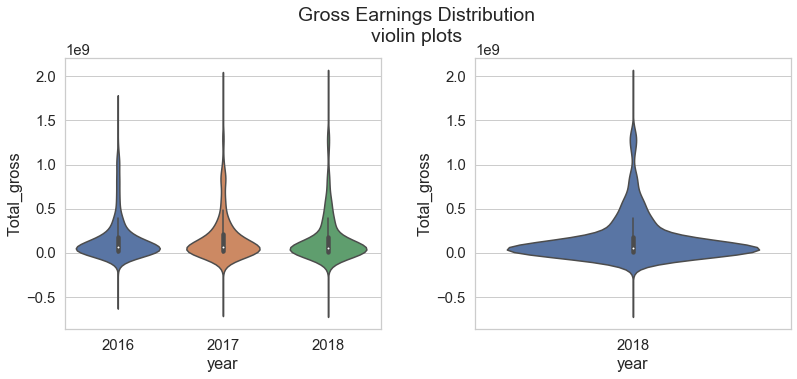

In [18]:
# viewing the three most recent years from the dataset
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))
sns.set(context='notebook', font_scale=1.35)

# give a little more space between the 'suptitle' and fiugre
fig.suptitle("Gross Earnings Distribution\nviolin plots", y=1.02)
# and between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.3, hspace=None)

sns.violinplot(x="year", y="Total_gross", data=bom_2016_18_df, ax=ax[0], cut=8)
sns.violinplot(x="year", y="Total_gross", data=bom_2018_df, ax=ax[1], cut=8)

plt.show()

<h3 align='center'><font color='coral'>Budget</font></h3>

### Now let's take a look at buget information in the `clean_tn_tbl`

In [19]:
cur.execute('''SELECT *
                    FROM clean_tn_tbl
                    WHERE Year BETWEEN 2016 AND 2018
                    ;
                    ''')

tn_df = pd.DataFrame(cur.fetchall())
tn_df.columns = [x[0] for x in cur.description]

In [20]:
# note: sorting will only work if datatypes are appropriately converted
tn_sort_2016_18 = tn_df.sort_values(['worldwide_gross'], ascending=[0])
tn_sort_2016_18.shape, tn_sort_2016_18.head(10)

((506, 9),
     index  id         release_date                              movie  \
 1       6   7  2018-04-27 00:00:00             Avengers: Infinity War   
 9      41  42  2018-02-16 00:00:00                      Black Panther   
 0       4   5  2017-12-15 00:00:00  Star Wars Ep. VIII: The Last Jedi   
 33    112  13  2018-06-22 00:00:00     Jurassic World: Fallen Kingdom   
 37    134  35  2017-03-17 00:00:00               Beauty and the Beast   
 10     43  44  2018-06-15 00:00:00                      Incredibles 2   
 6      22  23  2017-04-14 00:00:00            The Fate of the Furious   
 38    135  36  2018-12-21 00:00:00                            Aquaman   
 4      16  17  2016-05-06 00:00:00         Captain America: Civil War   
 11     44  45  2016-12-16 00:00:00       Rogue One: A Star Wars Story   
 
     production_budget  domestic_gross  worldwide_gross  Year    ROI  
 1         300000000.0     678815482.0     2.048134e+09  2018  85.35  
 9         200000000.0     7000

There appears to be only 506 rows in this table, but they look like a significant 506.

In [21]:
tn_sort_2016_18.dtypes

index                  int64
id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
Year                  object
ROI                  float64
dtype: object

### The `tn...` dataframe also enables us to compute net earnings figures.

In [22]:
tn_sort_2016_18['Worldwide_net'] = round(
    tn_sort_2016_18['worldwide_gross'], 3)
- round(tn_sort_2016_18['production_budget'], 3)

W_net_16_18 = tn_sort_2016_18.sort_values(
    by=['Worldwide_net'], ascending=False)
W_net_16_18.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,ROI,Worldwide_net
1,6,7,2018-04-27 00:00:00,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,85.35,2.048134e+09
9,41,42,2018-02-16 00:00:00,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,85.17,1.348258e+09
0,4,5,2017-12-15 00:00:00,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,75.93,1.316722e+09
33,112,13,2018-06-22 00:00:00,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,2018,86.98,1.305773e+09
37,134,35,2017-03-17 00:00:00,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,2017,87.29,1.259200e+09
10,43,44,2018-06-15 00:00:00,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018,83.90,1.242521e+09
6,22,23,2017-04-14 00:00:00,The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,2017,79.75,1.234846e+09
38,135,36,2018-12-21 00:00:00,Aquaman,160000000.0,335061807.0,1.146895e+09,2018,86.05,1.146895e+09
4,16,17,2016-05-06 00:00:00,Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,2016,78.07,1.140069e+09
11,44,45,2016-12-16 00:00:00,Rogue One: A Star Wars Story,200000000.0,532177324.0,1.049103e+09,2016,80.94,1.049103e+09


A data dictionary could help us to further differentiate earnings discrepancies in the data between these two tables (eg., strictly box office vs all media) as well as providing clearer understanding for when data were collected.

### What can we infer from a cursory visual analysis of `production_budget`, `worldwide_gross`, and `Worldwide_net`

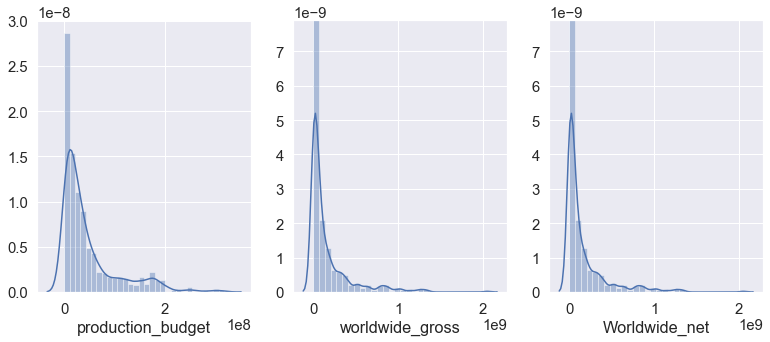

In [23]:
# set a 3 - column axis on a matplotlib figure
fig, ax = plt.subplots(ncols=3, figsize=(13, 5))

# create Seaborn distribution subplots for budget, worldwide gross,
# and worldwide net
sns.distplot(tn_sort_2016_18.production_budget, bins = 30, ax=ax[0])
sns.distplot(tn_sort_2016_18.worldwide_gross, bins = 30
             , ax=ax[1])
sns.distplot(tn_sort_2016_18.Worldwide_net, bins = 30
             , ax=ax[2])

plt.show()


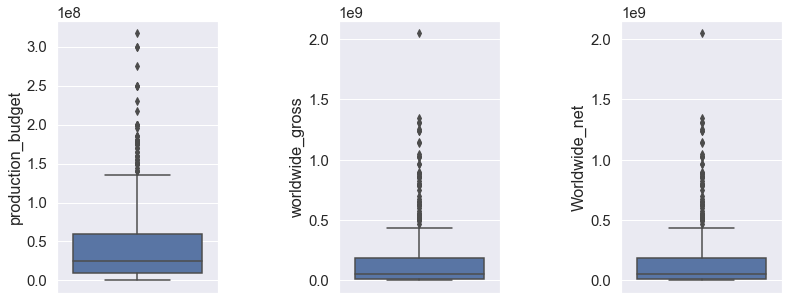

In [24]:
fig, ax = plt.subplots(ncols=3, figsize=(13, 5))
sns.boxplot(tn_sort_2016_18.production_budget, orient='v', ax=ax[0])
sns.boxplot(tn_sort_2016_18.worldwide_gross, orient='v', ax=ax[1])
sns.boxplot(tn_sort_2016_18.Worldwide_net, orient='v', ax=ax[2])
 
plt.subplots_adjust(wspace=.75, hspace=.5);
sns.set(font_scale=1.25)
plt.show()


It seems a few things are generously funded (far above the median), most are well funded (in the upper quartile), and relatively high net profit is rare thing.

In [25]:
print("Middle Quantile Budget: ", tn_sort_2016_18.production_budget.quantile(.5), "        Middle Quantile Worldwide Gross: ", tn_sort_2016_18.worldwide_gross.quantile(.5))
print("Middle Quantile Net:    ", tn_sort_2016_18.Worldwide_net.quantile(.5))

Middle Quantile Budget:  25000000.0         Middle Quantile Worldwide Gross:  55674516.0
Middle Quantile Net:     55674516.0


<h2 align='center'><font color='chocolate'>Correlation</font></h2>

<h3>Question(s)</h3>

* Are gross and net figures positively correlated
* ... Budget and ROI

These points can help eliminate redundancy in our analysis. If correlation is strong between gross and net data, for example, then we can explore one to make inferences about the other.

<h3 align='center'><font color='coral'>gross, net</font></h3>

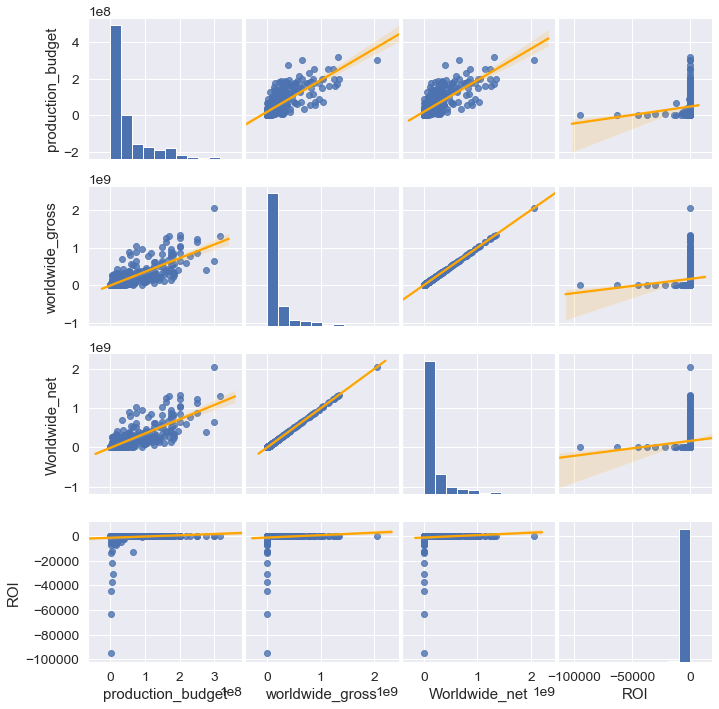

In [26]:
# view a seaborn pairplot matrix with regression lines
df1 = tn_sort_2016_18[["production_budget", "worldwide_gross",
                     "Worldwide_net", "ROI"]]
sns.pairplot(df1, kind="reg", plot_kws={'line_kws':{'color':'orange'}})
sns.set(font_scale=.8) # try to prevent overlap of long column names
plt.subplots_adjust(wspace=.02, hspace=.2);
plt.show()

We see from the visualizations that there are strong, positive correlations between budget and gross earnings.

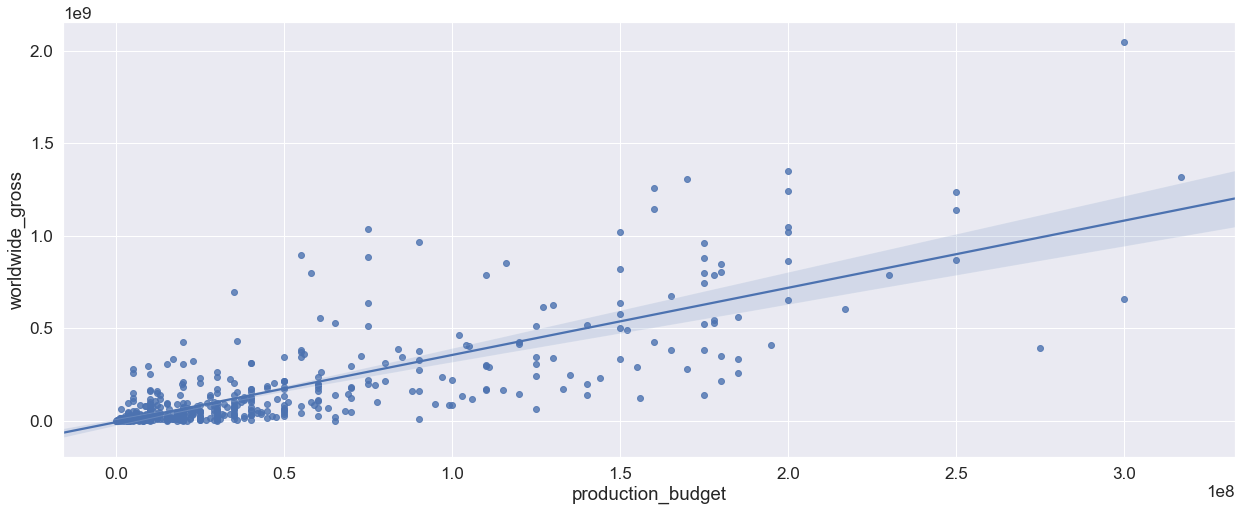

In [27]:
# create a variable for the correlation
corr = df1.corr()

# subplots
plt.figure(figsize=(21, 8)) # total figure size

plt.subplots_adjust(wspace=.35, hspace=.1); # prevent overlap
sns.set(font_scale=1.55) # adjust for annotation legibility

plt.subplot(1,1,1) # correlation with regression line
sns.regplot(x='production_budget', y='worldwide_gross', data=df1)

plt.show()

### The relationship between budget and ROI seems a bit more complex.

In [28]:
t = tn_sort_2016_18

t_gross_below_mean = t.loc[t['worldwide_gross'] < t['worldwide_gross'].mean()]
t_gross_above_mean = t.loc[t['worldwide_gross'] > t['worldwide_gross'].mean()]

Correlation for earnings below the mean: 0.10529470398617378 ; and above the mean: -0.4320160441549467


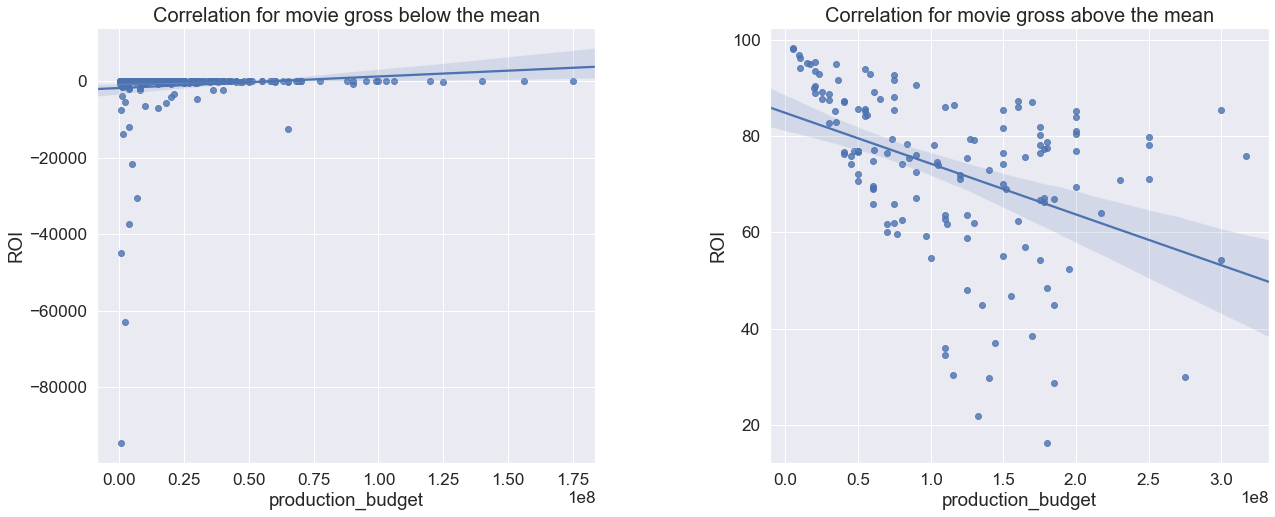

In [29]:
t1 = t_gross_below_mean
t2 = t_gross_above_mean

print("Correlation for earnings below the mean:"
      , t1.production_budget.corr(t1.ROI)
      , "; and above the mean:", 
      t2.production_budget.corr(t2.ROI))

# subplots
plt.figure(figsize=(21, 8)) # total figure size
plt.subplots_adjust(wspace=.35, hspace=.1); # prevent overlap
sns.set(font_scale=1.55) # adjust for annotation legibility

plt.subplot(1,2,1) # correlation with regression line
plt.title("Correlation for movie gross below the mean", fontsize=20)
sns.regplot(x='production_budget', y='ROI', data=t1)

plt.subplot(1,2,2) # correlation with regression line
plt.title("Correlation for movie gross above the mean", fontsize=20)
sns.regplot(x='production_budget', y='ROI', data=t2)

plt.show()

We can delve further into whether budget spend is predictive, as we move on to take a look at top studios in the industry.

In [30]:
cur.close()
conn.close()